<a href="https://colab.research.google.com/github/albertomarin12/Simulac-n-matem-tica/blob/main/06_Probabilidad_Precio_Umbral.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aplicando Python para análisis de precios: simulación de escenarios futuros de precios

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/d/d7/Philippine-stock-market-board.jpg" width="400px" height="125px" />

> En la clase anterior vimos como importar datos de activos de la base de datos de Yahoo Finance usando el paquete pandas-datareader. En esta clase, veremos como pronosticar escenarios de evolución de precios, suponiendo que los rendimientos diarios se distribuyen normalmente. Como esta evolución de precios es aleatoria, utilizaremos la simulación montecarlo (hacer muchas simulaciones de escenarios de evolución de precios) para obtener probabilidades de que los precios de cierre estén encima de un valor umbral y tomar decisiones con base en estas probabilidades.

**Referencias:**
- http://pandas.pydata.org/
- http://www.learndatasci.com/python-finance-part-yahoo-finance-api-pandas-matplotlib/

## 1. Recordemos como descargar datos...

Antes que nada, para poder hacer simular escenarios de predicción de precios, vamos a recordar lo que hicimos en la clase pasada de descargar los datos de Yahoo Finance, utilizando el paquete `data` de la librería `pandas_datareader`.

Esta vez, utilizaremos los datos de precios de cierre ajustados de activos de la compañía Apple en el año 2016 para nuestra aplicación.

In [ ]:
# Instalación del paquete
!pip install yfinance

# conda install pandas-datareader
# pip install pandas-datareader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import yfinance as yf
import pandas_datareader.data as web
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
def getClose(names, start, end):
    return yf.download(names, start=start, end=end)["Adj Close"]

def getHigh(names, start, end):
    return yf.download(names, start=start, end=end)["High"]

def getLow(names, start, end):
    return yf.download(names, start=start, end=end)["Low"]

In [ ]:
ticker = "AAPL"
periodos = 252 # Cantidad en dias de simulaciones
inicio = "2020-01-01" #inicio de datos
final = "2020-12-31" #final de datos
fecha = "2021-01-01" # Primer dato a simular
ffinal = "2021-12-31" #ultimo dato a simular
per = 252 # Datos futuros a simular
data_aapl = getClose(ticker,inicio,final)
#data_aapl.plot.hist()

[*********************100%***********************]  1 of 1 completed


In [ ]:
data_aapl.describe()

count    252.000000
mean      93.625825
std       21.576295
min       54.999001
25%       75.711456
50%       89.881687
75%      113.974527
max      134.862671
Name: Adj Close, dtype: float64

In [ ]:
R = (data_aapl - data_aapl.shift())/data_aapl.shift()
r = np.log(data_aapl/data_aapl.shift())

#r.plot.hist(alpha = 0.5)
#R.plot.hist(alpha = 0.5)


In [ ]:
R_aapl_mean = R.mean()
R_aapl_std = R.std()


In [ ]:
def sim_r(media, std, inicio, dias, N):
    # media 
    # desviación estándar
    # desde qué fecha inicio a simular
    # cuántos días voy a simular
    # N: cuántas simulaciones
    r = np.random.normal(media, std, size=(dias, N))
    fechas = pd.date_range(inicio, periods=dias)
    return pd.DataFrame(index = fechas, data = r)
r_simulados = sim_r(R_aapl_mean, R_aapl_std, fecha, per, 1000)

In [ ]:
precios_simulados = (r_simulados + 1).cumprod()*data_aapl[-1] # r_simulados son cumprod es producto acumulado
precios_simulados

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
2021-01-01,126.185167,128.102001,130.140159,132.427425,131.117533,137.870519,139.558564,129.098213,129.278546,134.093093,...,134.587893,130.389490,133.587190,135.887262,130.909701,132.248653,136.506471,131.223284,132.342428,131.792042
2021-01-02,127.067604,132.681573,125.940381,133.090264,123.184381,138.320129,146.525021,125.404939,132.015084,132.957447,...,131.084815,125.361816,134.191102,139.074523,133.663935,132.702732,138.568442,131.015013,133.494087,133.041273
2021-01-03,122.992481,136.136861,128.418787,134.956591,121.493941,140.315964,154.854294,122.686501,131.978168,127.859358,...,142.755472,125.729723,136.998019,140.980596,135.525028,138.381603,136.000055,129.356259,136.816129,132.418855
2021-01-04,119.245916,130.871572,127.363580,131.895541,121.018222,139.792535,153.359642,120.348959,129.435620,135.267681,...,138.560716,123.436999,132.170371,141.267574,137.219812,137.604695,138.027664,135.052623,135.175940,131.204872
2021-01-05,120.012540,134.486254,126.153558,129.181387,119.946706,139.039236,154.640278,121.565278,131.104347,137.860101,...,142.726401,122.590667,134.567267,134.487509,136.263123,139.487148,141.128724,139.806259,132.901135,129.064709
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09-05,154.640632,267.959582,205.843021,297.214706,286.989257,85.379059,286.681357,142.045537,140.342738,457.108637,...,147.429720,464.434450,79.786657,215.069843,316.901292,225.841132,508.824081,419.649030,159.373318,305.098885
2021-09-06,159.348337,272.387224,207.859158,299.141607,288.405907,86.063615,285.571525,135.991892,138.544304,460.193187,...,147.657959,446.903472,79.318412,208.780499,304.111019,226.172858,492.232472,421.812983,167.872346,315.162793
2021-09-07,154.354408,271.256565,222.728917,296.568352,285.450187,84.743639,299.204104,135.837665,138.121015,452.852189,...,150.245922,443.565043,78.539918,209.716171,311.447848,229.921167,493.879292,404.834531,172.792119,347.933932
2021-09-08,153.648658,280.233138,233.302589,296.924954,289.115225,86.104396,305.772289,134.863601,139.123606,436.824843,...,152.501249,445.619396,77.052930,211.443434,311.672327,232.838356,469.607066,407.736246,173.472931,324.386494


In [ ]:
#precios_simulados = (r_simulados + 1).cumprod()*data_aapl[-1]
#precios_simulados.plot()

[*********************100%***********************]  1 of 1 completed


<Axes: xlabel='Date'>

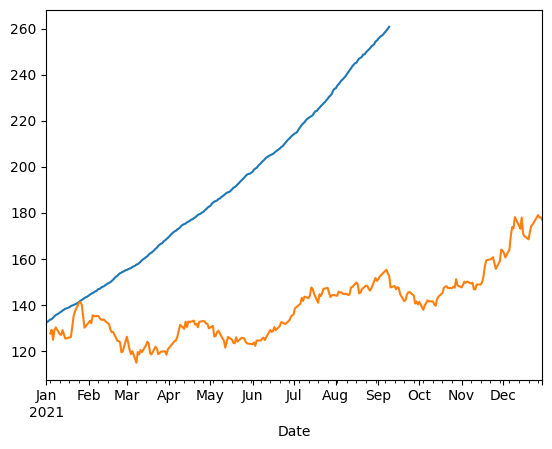

In [ ]:
((r_simulados + 1).cumprod()*data_aapl[-1]).mean(axis=1).plot()
data = getClose(ticker,fecha,ffinal)
data.plot()


In [ ]:
((r_simulados + 1).cumprod()).mean(axis=1)

2021-02-04    1.011406
2021-02-05    1.015855
2021-02-06    1.021139
2021-02-07    1.025596
2021-02-08    1.031935
2021-02-09    1.039994
2021-02-10    1.047034
2021-02-11    1.050809
2021-02-12    1.055589
Freq: D, dtype: float64

In [ ]:
((r_simulados + 1).cumprod()*data_aapl[-1]).mean(axis=1)

2021-02-04    56.406107
2021-02-05    56.654241
2021-02-06    56.948927
2021-02-07    57.197466
2021-02-08    57.551028
2021-02-09    58.000475
2021-02-10    58.393101
2021-02-11    58.603646
2021-02-12    58.870213
Freq: D, dtype: float64

In [ ]:
data

Date
2021-02-04    57.599998
2021-02-05    56.669998
2021-02-08    59.070000
2021-02-09    62.840000
2021-02-10    61.259998
2021-02-11    60.270000
2021-02-12    59.849998
Name: Adj Close, dtype: float64

In [ ]:
D = data[-1]
d = precios_simulados.mean(axis=1)[-1]
print("ERROR",((D/d)-1)*100,"%")

ERROR 1.6643146288052524 %


In [ ]:
data.describe()

count     7.000000
mean     59.651428
std       2.106019
min      56.669998
25%      58.334999
50%      59.849998
75%      60.764999
max      62.840000
Name: Adj Close, dtype: float64

In [ ]:
pd.date_range(start="2023-03-01", periods = 17)

DatetimeIndex(['2023-03-01', '2023-03-02', '2023-03-03', '2023-03-04',
               '2023-03-05', '2023-03-06', '2023-03-07', '2023-03-08',
               '2023-03-09', '2023-03-10', '2023-03-11', '2023-03-12',
               '2023-03-13', '2023-03-14', '2023-03-15', '2023-03-16',
               '2023-03-17'],
              dtype='datetime64[ns]', freq='D')

## 3. Proyección de precios de cierre

Por tanto, para calcular los precios, tenemos:

$$\begin{align}
p_i&=p_{i-1}(R_i+1)\\
p_{i+1}&=p_i(R_{i+1}+1)=p_{i-1}(R_i+1)(R_{i+1}+1)\\
&\vdots\\
p_{i+k}&=p_{i-1}(R_i+1)\cdots(R_{i+k}+1).
\end{align}$$

Si hacemos $i=0$ en la última ecuación, tenemos que $p_{k}=p_{-1}(R_0+1)\cdots(R_{k}+1)$, donde $p_{-1}$ es el último precio reportado en el 2018.

Con los rendimientos, calculamos los precios de cierre...

## 4. Probabilidad Precio-Umbral

Ya que tenemos muchos escenarios de precios proyectados, podemos ver varias cosas. Por ejemplo, ¿cuál es la probabilidad de que el precio de cierre sobrepase algún valor umbral en algún momento?

In [ ]:
valor_deseado = 180
#data_aapl[-1]*1.10
probabilidad = (precios_msft_simulados >= valor_deseado).mean(axis=1)
plt.figure()
plt.plot(probabilidad)
plt.grid()

NameError: ignored

___
Entonces, ya aprendimos a bajar datos con pandas-datareader. En específico, a partir de los precios de cierre ajustados obtuvimos los rendimientos diarios.

Suponiendo que los rendimientos diarios son un proceso estocástico estacionario de distribución normal, pudimos caracaterizarlo y proyectar varios escenarios de evolución de los precios (montecarlo).

Con estas proyecciones pudimos calcular probabilidades de sobrepasar cierto precio umbral: toma de decisiones.